In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=1000,skip_top=3 ) # load dataset and split it between training and testing

word_index = tf.keras.datasets.imdb.get_word_index() # word index = (word : num of appearances)

index2word = dict((i, word) for (word, i) in word_index.items())

x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train]) # create datasets in numpy array format
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

In [2]:
print(len(word_index))
#print(word_index)
#print(x_train[0])

88584


In [3]:
vacabulary = list()
for text in x_train:
  tokens = text.split()
  vacabulary.extend(tokens)

vocabulary = set(vacabulary)
print(len(vocabulary))

997


In [7]:
dictonary  = dict()
for world in vacabulary :
  dictonary[world] = 0

print(len(dictonary))

997


In [8]:
dictonary  = dict()
for world in vacabulary :
  if world in dictonary:
    dictonary.update({world: dictonary[world] + 1})
  else:
    dictonary[world] = 0

print(len(dictonary))

997


In [9]:
from collections import OrderedDict


sorted_dict = dict(sorted(dictonary.items(), key=lambda item: item[1]),reverse = True)
counter = 0
k = 5
"""for x in sorted_dict:
  print(x,sorted_dict[x])"""

for x in list(sorted_dict):
  print(x,sorted_dict.pop(x,None))
  counter =  counter + 1

  if counter == 5:
    break
"""print()
for x in sorted_dict:
  print(x,sorted_dict[x])"""

cop 600
co 603
portrayed 605
era 605
fighting 606


'print()\nfor x in sorted_dict:\n  print(x,sorted_dict[x])'

In [10]:
neoVocabulary = list()
for x in sorted_dict:
  neoVocabulary.append(x)

"""for x in neoVocabulary:
  print(x)
"""
print(len(neoVocabulary))
print(len(sorted_dict))

993
993


In [8]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in neoVocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in neoVocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)

100%|██████████| 25000/25000 [01:19<00:00, 316.27it/s]


In [9]:
import tensorflow as tf
import numpy as np

def sigmoid(t):
    return 1/(1+np.exp(-t)) # s(x) = 1/(1+e^(-x)) <--- Sigmoid function (Logistic Regression Function)

class LogisticRegression():

    def __init__(self, learning_rate=0.3, number_of_iterations=1000, lmd=0.4):
        self.learning_rate = learning_rate # The Learning Rate of the Logistic Regression
        self.number_of_iterations = number_of_iterations # The number of iterations
        self.lmd = lmd
        self.w = None # initializing the weights as None
        self.b = None # and the bias

    def fit(self, x, y):
        number_of_samples, number_of_features = x.shape # we get the number of samples and features from the x
        self.w = np.zeros(number_of_features) # we create the weight as an array of 0 in the size of the number of the features (initializing the weights)
        self.b = 0 # and setting the bias as zero

        for i in range(self.number_of_iterations):
            linear_predictions = np.dot(x, self.w) + self.b # We are using the linear regression function
            predictions = sigmoid(linear_predictions) # We insert it's outcome as an parameter of the Logistic Regression function
            
            dw = (1/number_of_samples) * np.dot(x.T, (predictions - y)) + ((self.lmd/number_of_samples) * self.w) # We calculate the gradient of the weight
            db = (1/number_of_samples) * np.sum(predictions-y) # We calculate the gradient of the bias

            self.w = self.w - self.learning_rate*dw # We calculate the new weight 
            self.b = self.b - self.learning_rate*db # and the new bias by removing the gradient multiplied by the learning rate


    def predict(self, X):
        linear_prediction = np.dot(X, self.w) + self.b # The Linear Regression prediction Equation is used
        logistic_prediction = sigmoid(linear_prediction) # We insert its outcome as a parameter of the logistic regression
        class_prediction = list()
        for y in logistic_prediction:
          if y<= 0.5:
            class_prediction.append(0)
          else:
            class_prediction.append(1) # We save all the outcomes as 0 or 1 depending on their actual value
        return class_prediction # and we return them

In [10]:
clf = LogisticRegression()
clf.fit(x_train_binary,y_train)
logistic_prediction = clf.predict(x_test_binary)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     12500
           1       0.86      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

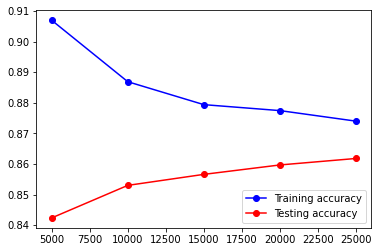

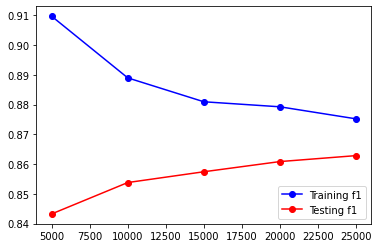

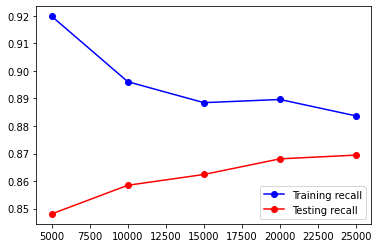

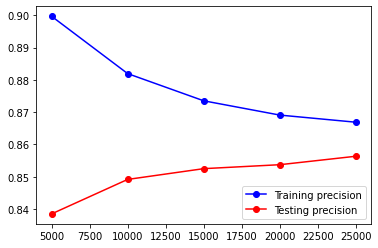

In [13]:
def custom_learning_curve(type,x_train, y_train, x_test, y_test,n_splits):
  
  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  curr_y = y_splits[0]
  log = LogisticRegression()
  log.fit(curr_x, curr_y)

  if (type == 'accuracy'):
    train_accuracies.append(accuracy_score(curr_y,log.predict(curr_x)))
    test_accuracies.append(accuracy_score(y_test, log.predict(x_test)))
  elif (type == 'f1'):
    train_accuracies.append(f1_score(curr_y,log.predict(curr_x)))
    test_accuracies.append(f1_score(y_test, log.predict(x_test)))
  elif (type == "recall"):
    train_accuracies.append(recall_score(curr_y,log.predict(curr_x)))
    test_accuracies.append(recall_score(y_test, log.predict(x_test)))
  else:
    train_accuracies.append(precision_score(curr_y,log.predict(curr_x)))
    test_accuracies.append(precision_score(y_test, log.predict(x_test)))
    



  for i in range(1, len(x_splits)):
    log = LogisticRegression()
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    log.fit(curr_x, curr_y)
    if (type == 'accuracy'):
      train_accuracies.append(accuracy_score(curr_y,log.predict(curr_x)))
      test_accuracies.append(accuracy_score(y_test, log.predict(x_test)))
    elif (type == 'f1'):
      train_accuracies.append(f1_score(curr_y,log.predict(curr_x)))
      test_accuracies.append(f1_score(y_test, log.predict(x_test)))
    elif (type == "recall"):
      train_accuracies.append(recall_score(curr_y,log.predict(curr_x)))
      test_accuracies.append(recall_score(y_test, log.predict(x_test)))
    else:
      train_accuracies.append(precision_score(curr_y,log.predict(curr_x)))
      test_accuracies.append(precision_score(y_test, log.predict(x_test)))


  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training"+" "+type)

  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing"+" "+type)
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve('accuracy',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve('f1',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve('recall',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve('precision',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

ΜΕΡΟΣ Β

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


log = LogisticRegression(solver='saga',max_iter=1000)
log.fit(x_train_binary, y_train)


print(classification_report(y_test, log.predict(x_test_binary)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     12500
           1       0.85      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [18]:
def custom_learning_curve2(type,x_train, y_train, x_test, y_test,n_splits):
  
  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  curr_y = y_splits[0]
  log2 = LogisticRegression(solver='saga',max_iter=1000)
  log2.fit(curr_x, curr_y)

  if (type == 'accuracy'):
    train_accuracies.append(accuracy_score(curr_y,log2.predict(curr_x)))
    test_accuracies.append(accuracy_score(y_test, log2.predict(x_test)))
  elif (type == 'f1'):
    train_accuracies.append(f1_score(curr_y,log2.predict(curr_x)))
    test_accuracies.append(f1_score(y_test, log2.predict(x_test)))
  elif (type == "recall"):
    train_accuracies.append(recall_score(curr_y,log2.predict(curr_x)))
    test_accuracies.append(recall_score(y_test, log2.predict(x_test)))
  else:
    train_accuracies.append(precision_score(curr_y,log2.predict(curr_x)))
    test_accuracies.append(precision_score(y_test, log2.predict(x_test)))
    



  for i in range(1, len(x_splits)):
    log2 = LogisticRegression(solver='saga',max_iter=1000)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    log2.fit(curr_x, curr_y)
    if (type == 'accuracy'):
      train_accuracies.append(accuracy_score(curr_y,log2.predict(curr_x)))
      test_accuracies.append(accuracy_score(y_test, log2.predict(x_test)))
    elif (type == 'f1'):
      train_accuracies.append(f1_score(curr_y,log2.predict(curr_x)))
      test_accuracies.append(f1_score(y_test, log2.predict(x_test)))
    elif (type == "recall"):
      train_accuracies.append(recall_score(curr_y,log2.predict(curr_x)))
      test_accuracies.append(recall_score(y_test, log2.predict(x_test)))
    else:
      train_accuracies.append(precision_score(curr_y,log2.predict(curr_x)))
      test_accuracies.append(precision_score(y_test, log2.predict(x_test)))


  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training"+" "+type)

  plt.plot(list(range(split_size, len(x_train) + split_size, 
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing"+" "+type)
  plt.legend(loc="lower right")
  plt.show()

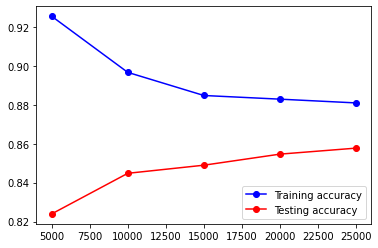

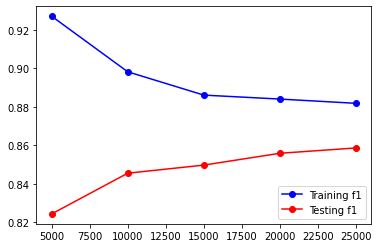

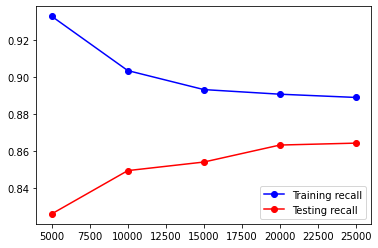

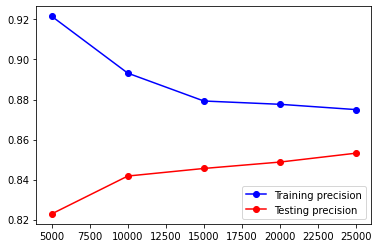

In [16]:
custom_learning_curve2('accuracy',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve2('f1',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve2('recall',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)

custom_learning_curve2('precision',x_train=x_train_binary, y_train=y_train,x_test=x_test_binary,
                      y_test=y_test, n_splits=5)